# ANÁLISIS EXPLORATORIO DE CERVEZAS ARTESANAS NACIONALES

A partir de los datos obtenidos y preprocesados sobre una base de datos con cerca de 400 cerevezas artesanas de origen español, vamos a hacer un estudio del que pretendemos sacer información sobre cómo es la cerveza artesana nacional.
Para ello, estudiaremos los diferentes parámetros y sus relaciones de modo que podamos extraer conclusiones.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.rcParams["image.cmap"] = "terrain"
#palette = plt.get_cmap('terrain')

import matplotlib.style as style 
style.available
style.use('fivethirtyeight')

import seaborn as sns
import plotly.graph_objs as go

In [2]:
# leemos el fichero de datos
df=pd.read_csv("data/soloartesanas_limpio.csv", sep=";")
df.head()

,id,color,name,brand,description,image,Estilo,Graduación,Fermentación,IBU,Grano,Población,Provincia,Comunidad Autónoma,País
0,2,rubia,Alegría & Boris Brew Ipanosuarus Rex,Cervezas Alegría,"\nUna doble IPA rubia, potente y seca. Elabora...",https://static3.soloartesanas.es/3333-large_de...,Imperial / Double IPA,8.2,Ale,60.0,NaN,Massanassa,Valencia,Valencia,España
1,3,rubia,Roy The Bull Mango,Roy The Bull,\nAquí está la primera cerveza de Roy The Bull...,https://static3.soloartesanas.es/3332-large_de...,Fruit Beer,6.0,Ale,38.0,NaN,Vigo,Pontevedra,Galicia,España
2,4,rubia,Marijuana,Marijuana,\nLa única cerveza cerveza artesana que podrás...,https://static1.soloartesanas.es/3223-large_de...,Pale Ale,5.7,Ale,28.8,NaN,Hoyoasero,Ávila,Castilla y León,España
3,5,rubia,Arriaca Trigo (lata),Cervezas Arriaca,\nUna cerveza de trigo muy afrutada y ligera. ...,https://static2.soloartesanas.es/3449-large_de...,Weizen Weissbier,4.7,Ale,17.1,NaN,Yunquera de Henares,Guadalajara,Castilla-La Mancha,España
4,6,rubia,Bertus White IPA,Bertus,"\nCerveza de estilo IPA elaborada con trigo, j...",https://static2.soloartesanas.es/3201-large_de...,White IPA,6.6,Ale,50.0,NaN,Rubí,Barcelona,Cataluña,España


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  390 non-null    int64  
 1   color               390 non-null    object 
 2   name                390 non-null    object 
 3   brand               390 non-null    object 
 4   description         390 non-null    object 
 5   image               390 non-null    object 
 6   Estilo              390 non-null    object 
 7   Graduación          390 non-null    float64
 8   Fermentación        390 non-null    object 
 9   IBU                 390 non-null    float64
 10  Grano               280 non-null    object 
 11  Población           390 non-null    object 
 12  Provincia           390 non-null    object 
 13  Comunidad Autónoma  390 non-null    object 
 14  País                390 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 45.8+ K

## Analizamos el origen de estas cervezas
Son todas españolas, pero queremos saber en qué provincias y comunidades se registran más marcas

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


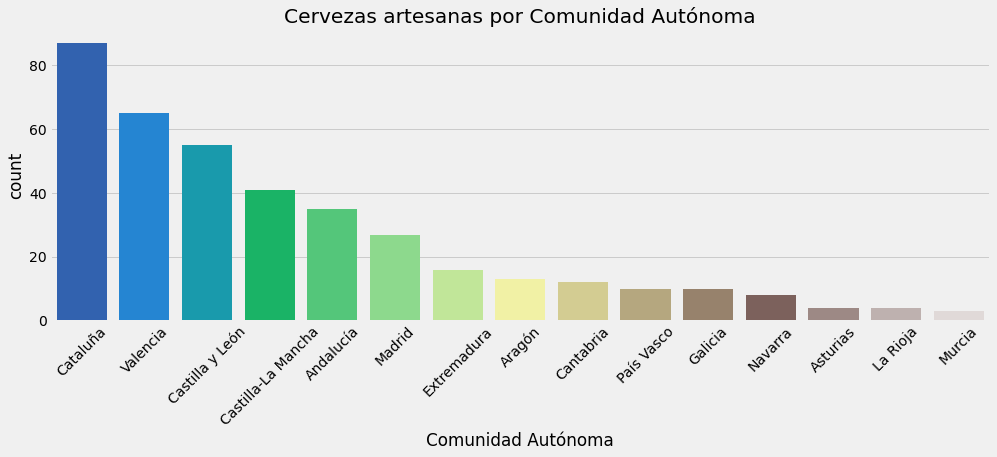

In [4]:
# Por comunidades autónomas. Ordenadas

plt.figure(figsize=(15,5))
sns.countplot(df['Comunidad Autónoma'], 
              palette="terrain",
              order = df['Comunidad Autónoma'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cervezas artesanas por Comunidad Autónoma");


In [5]:
df['Comunidad Autónoma'].value_counts()

Cataluña              87
Valencia              65
Castilla y León       55
Castilla-La Mancha    41
Andalucía             35
Madrid                27
Extremadura           16
Aragón                13
Cantabria             12
País Vasco            10
Galicia               10
Navarra                8
Asturias               4
La Rioja               4
Murcia                 3
Name: Comunidad Autónoma, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


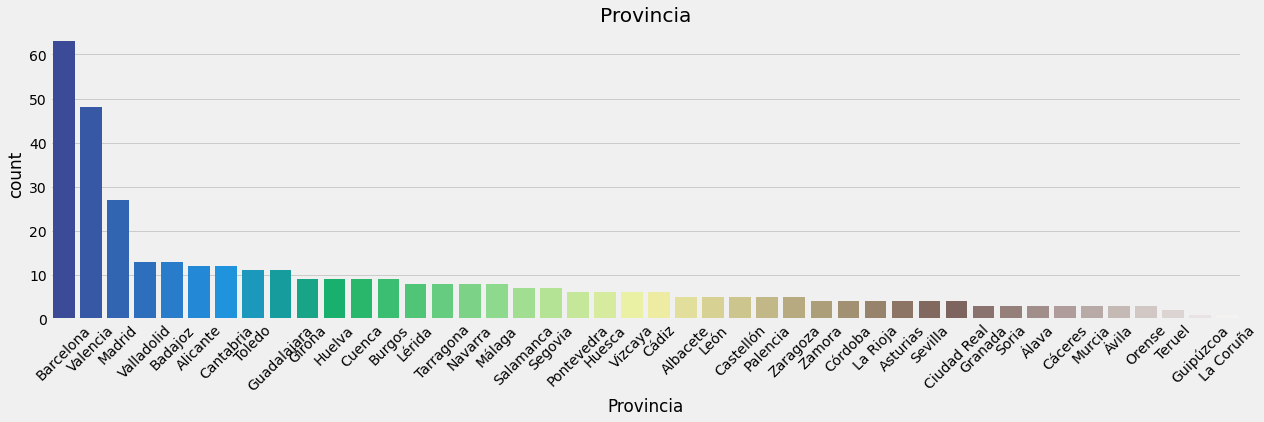

In [6]:
# ¿cómo es el reparto por provincias?
plt.figure(figsize=(19,5))
sns.countplot(df['Provincia'], 
              palette="terrain",
              order = df['Provincia'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Provincia");

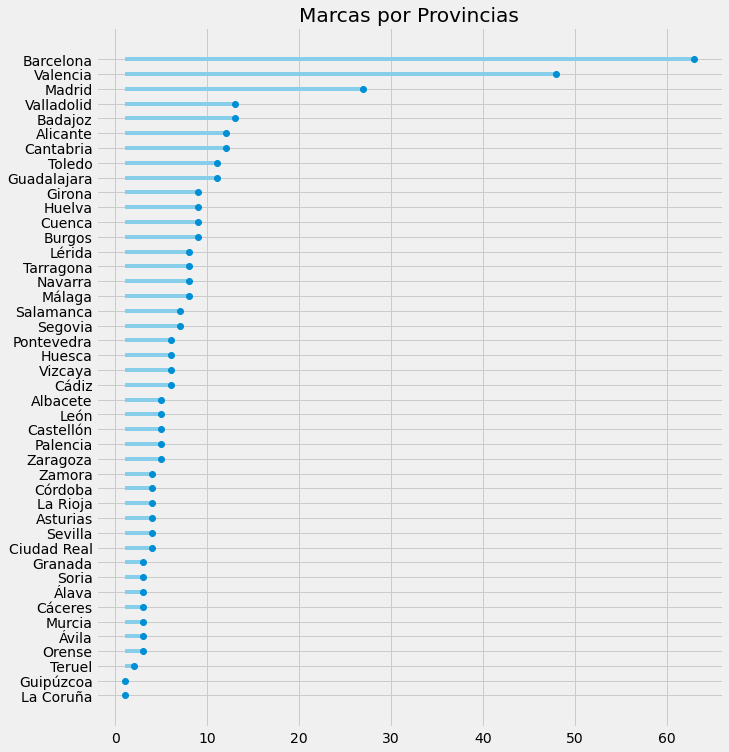

In [7]:
conteo = df['Provincia'].value_counts(ascending=True)

plt.figure(figsize=(10,12))
plt.hlines(y=conteo.index,
           xmin=1,
           xmax=conteo,
          color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title("Marcas por Provincias");

In [8]:
df['Provincia'].value_counts()

Barcelona      63
Valencia       48
Madrid         27
Valladolid     13
Badajoz        13
Alicante       12
Cantabria      12
Toledo         11
Guadalajara    11
Girona          9
Huelva          9
Cuenca          9
Burgos          9
Lérida          8
Tarragona       8
Navarra         8
Málaga          8
Salamanca       7
Segovia         7
Pontevedra      6
Huesca          6
Vizcaya         6
Cádiz           6
Albacete        5
León            5
Castellón       5
Palencia        5
Zaragoza        5
Zamora          4
Córdoba         4
La Rioja        4
Asturias        4
Sevilla         4
Ciudad Real     4
Granada         3
Soria           3
Álava           3
Cáceres         3
Murcia          3
Ávila           3
Orense          3
Teruel          2
Guipúzcoa       1
La Coruña       1
Name: Provincia, dtype: int64

In [9]:
# TOP 10 POR PROVINCIAS

In [10]:
#Seleccionamos solo las 10 provincias con más marcas
top_prov=df['Provincia'].value_counts().head(10).index

# dataframe auxiliar para esas 10 provincias
df_top_10=df[df['Provincia'].isin(top_prov)]
df_top_10

,id,color,name,brand,description,image,Estilo,Graduación,Fermentación,IBU,Grano,Población,Provincia,Comunidad Autónoma,País
0,2,rubia,Alegría & Boris Brew Ipanosuarus Rex,Cervezas Alegría,"\nUna doble IPA rubia, potente y seca. Elabora...",https://static3.soloartesanas.es/3333-large_de...,Imperial / Double IPA,8.2,Ale,60.0,NaN,Massanassa,Valencia,Valencia,España
3,5,rubia,Arriaca Trigo (lata),Cervezas Arriaca,\nUna cerveza de trigo muy afrutada y ligera. ...,https://static2.soloartesanas.es/3449-large_de...,Weizen Weissbier,4.7,Ale,17.1,NaN,Yunquera de Henares,Guadalajara,Castilla-La Mancha,España
4,6,rubia,Bertus White IPA,Bertus,"\nCerveza de estilo IPA elaborada con trigo, j...",https://static2.soloartesanas.es/3201-large_de...,White IPA,6.6,Ale,50.0,NaN,Rubí,Barcelona,Cataluña,España
5,7,rubia,Bertus Summer Ale,Bertus,\nDe tipo Kölsch y elaborada con tres tipos de...,https://static1.soloartesanas.es/3200-large_de...,Kölsch,4.7,Ale,20.0,NaN,Rubí,Barcelona,Cataluña,España
6,8,rubia,Bertus Carpe Diem,Bertus,\nUna Pale Ale de estilo inglés elaborada con ...,https://static3.soloartesanas.es/3199-large_de...,English Pale Ale,5.4,Ale,28.0,NaN,Rubí,Barcelona,Cataluña,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,431,roja,Dragon's Breath,Tastet,\nTastet Beer elabora cervezas con mayúsculas....,https://static3.soloartesanas.es/707-large_def...,English Pale Ale,5.2,Ale,26.0,Cebada,Barcelona,Barcelona,Cataluña,España
386,432,roja,Gram Prima,Cervesa Gram,\nGram Prima es la cerveza artesana roja que e...,https://static2.soloartesanas.es/633-large_def...,Red Ale,5.0,Ale,53.5,Cebada,Ontinyent,Valencia,Valencia,España
387,433,roja,Nordeste,Cerveza La Grúa,\nLa cerveza artesana nordeste de Cerveza La G...,https://static3.soloartesanas.es/611-large_def...,Irish Red Ale,6.0,Ale,24.0,Cebada,Pontejos,Cantabria,Cantabria,España
388,434,roja,Burro de Sancho Roja,Sagra,\nLa cerveza artesana burro de Sancho Roja que...,https://static3.soloartesanas.es/3225-large_de...,Red Ale,5.0,Ale,53.5,Cebada,Yuncos,Toledo,Castilla-La Mancha,España


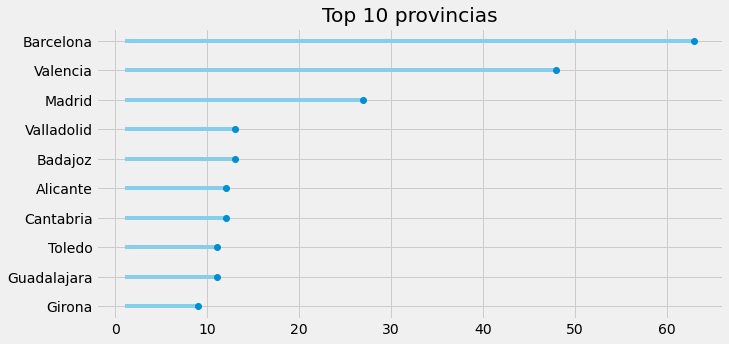

In [11]:
# Las 10 provincias que más marcas tienen
conteo = df_top_10['Provincia'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=1,
           xmax=conteo,
          color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title("Top 10 provincias");



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


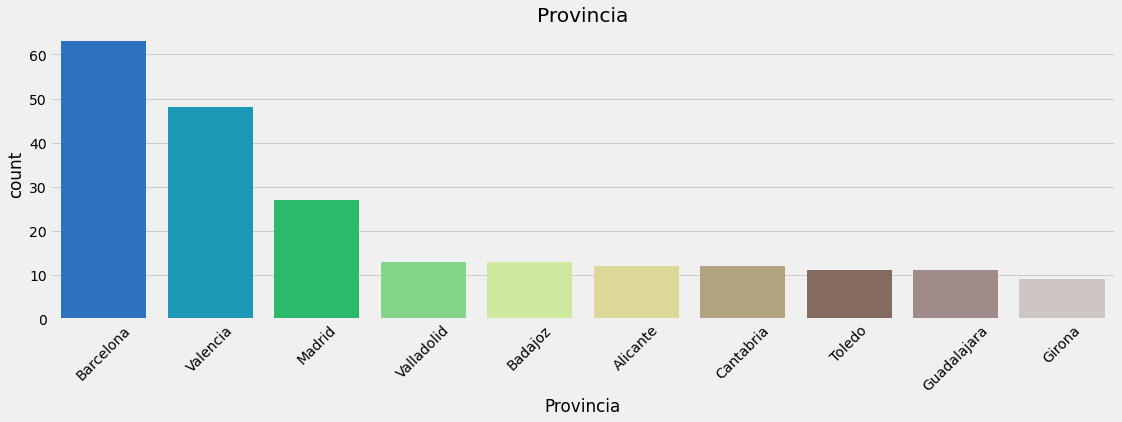

In [12]:
plt.figure(figsize=(17,5))
sns.countplot(df_top_10['Provincia'], 
              palette="terrain",
              order = df_top_10['Provincia'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Provincia");

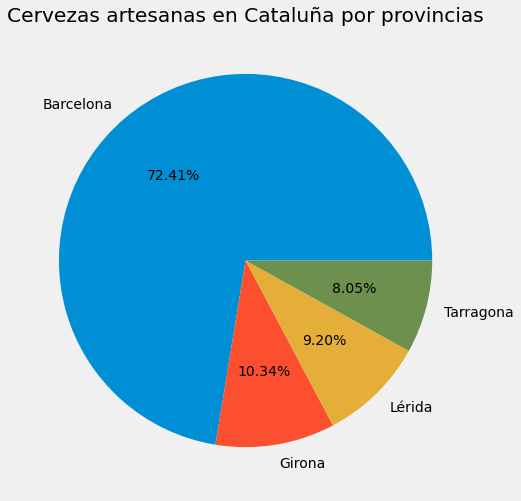

In [13]:
# Cataluña y sus provincias. Preparo el dato
data=df[df['Comunidad Autónoma']=="Cataluña"]
data=data.loc[:,('Comunidad Autónoma',"Provincia")]
data = data["Provincia"].value_counts()

# Tarta Cataluña

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Cervezas artesanas en Cataluña por provincias")
plt.show();




In [14]:
# creamos una serie con los top 10 y agrupamos el resto de provincias para verlo mejor
data_prov = df["Provincia"].value_counts()

data_prov_agrupado=data_prov[:14]
suma_resto=data_prov[14:].sum()
resto_prov=pd.Series(index=["Resto provincias"], data=[suma_resto])

data_prov_agrupado=data_prov_agrupado.append(resto_prov)

data_prov_agrupado

Barcelona            63
Valencia             48
Madrid               27
Valladolid           13
Badajoz              13
Alicante             12
Cantabria            12
Toledo               11
Guadalajara          11
Girona                9
Huelva                9
Cuenca                9
Burgos                9
Lérida                8
Resto provincias    136
dtype: int64

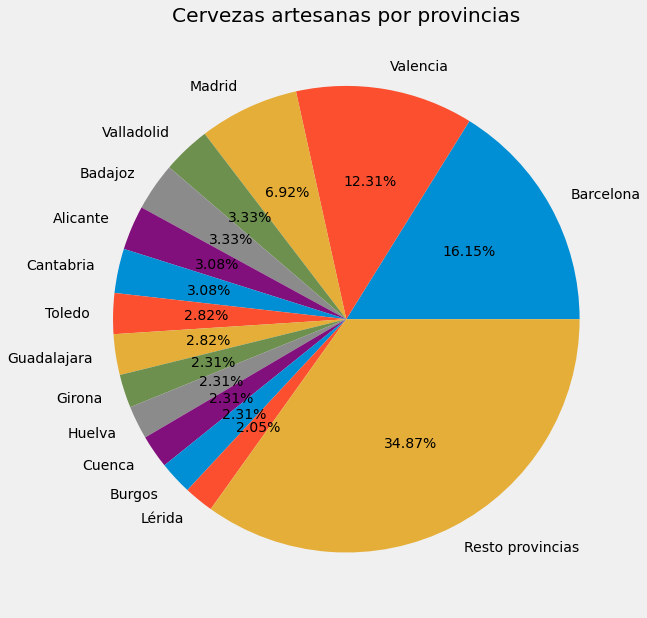

In [15]:
data=data_prov_agrupado

# Tarta Nacional
plt.figure(figsize=(10,10))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Cervezas artesanas por provincias")
plt.show();



In [48]:
# Afinando aún más, en qué poblaciones de Barcelona

pob_bcn=df[df["Provincia"]=="Barcelona"]["Población"]
pob_bcn.value_counts()

Barcelona                    10
Granollers                    6
Rubí                          5
L’Ametlla del Vallès          4
Suria                         4
Montornès del Vallès          4
Saldes                        4
Terrassa                      3
Lliça d'Amunt                 3
Badalona                      2
Canovelles                    2
Òdena                         2
Súria                         2
Poblenou                      2
L`Hospitalet de Llobregat     2
Berga                         2
Sant Boi de Llobregat         2
Sabadell                      1
Vilanova del Camí             1
Rubi                          1
Olost                         1
Name: Población, dtype: int64

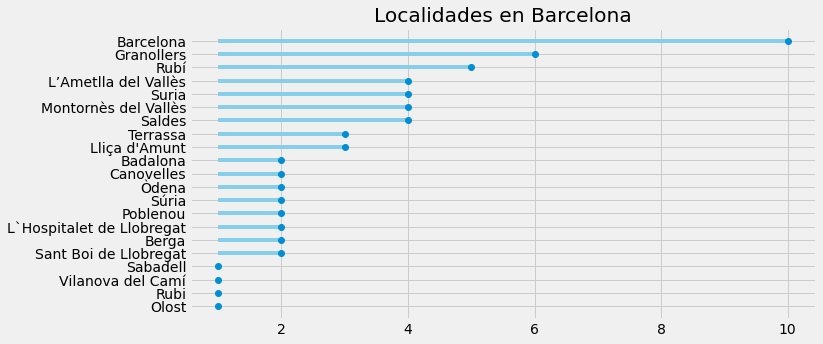

In [50]:
conteo = pob_bcn.value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=1,
           xmax=conteo,
          color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title("Localidades en Barcelona");



Por comunidades autónomas, Cataluña es la principal productora de cervezas artesanas, seguida por la Comunidad Valenciana, las dos Castillas, Andalucía y la Comunidad de Madrid.

Analizando por provincias, Barcelona está a la cabeza con diferencia dentro del panorama nacional y suma, además, casi las tres cuartas partes de las marcas artesanas que se producen en la comunidad catalana. 

Llama la atención el escalón que se produce entre las tres provincias con mayor número de marcas (Barcelona más de 60, Valencia casi 50 y Madrid cerca de 30) con el resto de provincias, que se situan entorno a 10 o menos.



## Características propias de la cerveza
De todas las características que distinguen a una cerveza, hemos obtenido información sobre el estilo, el amargor, el tipo de fermentación, la graduación y el grano.

### El color
El color de las cervezas recorre una gama de dorados y rojizos que para simplificar se puede resumir en estos cinco: blanca, rubia, roja, tostada y negra. Las cervezas estudiadas, matices a parte, se distribuyen en estas categorías de la siguiente forma: Predominan las rubias (casi el 47%) seguidas de tostadas y negras. Son las menos comunes las rojas y las blancas.

 

In [16]:
# Colores de las cervezas
df["color"].unique()

array(['rubia', 'tostada', 'negra', 'blanca', 'roja'], dtype=object)

         color     %
rubia      233  46.6
tostada     73  14.6
negra       59  11.8
roja        20   4.0
blanca       5   1.0 




/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


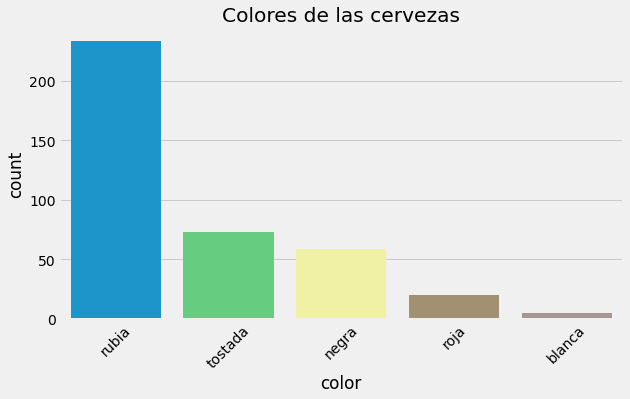

In [17]:
# Distribución de cervezas por colores

colores=df["color"].value_counts()
df_colores=pd.DataFrame(colores)
df_colores["%"]=round(df_colores["color"]/df_colores["color"].count(),2)
print(df_colores, "\n\n")

plt.figure(figsize=(9,5))
sns.countplot(df['color'], 
              palette="terrain",
              order = df['color'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Colores de las cervezas");


### El estilo y la fermentación
Las 390 cervezas analizadas están catalogadas entre una muy amplia variedad de estilos (más de 100), siendo las más populares las Pale Ale en diferentes versiones: Pale Ale, India Pale Ale, America Pale Ale... Esto da una idea del éxito de este tipo de productos tan de nicho, que permiten al consumidor encontrar cervezas más convencionales en versión artesana u otras tan especiales como la Menduiña María Soliña, una gallega ahumada de baja fermentación o la Althaia Rabosa, una Pumpkin Ale que recuerda al pastel de calabaza.
  
En lo que se refiere al tipo de fermentación, la mayoría de estas cervezas se fabrican con procesos de fermentación alta, a temperaturas entre 15ºC y 25ºC, que se conocen como Ale. Sin embargo, existen otros tipos como la Lager o fermentación baja, la mixta o la fermentación espontánea.

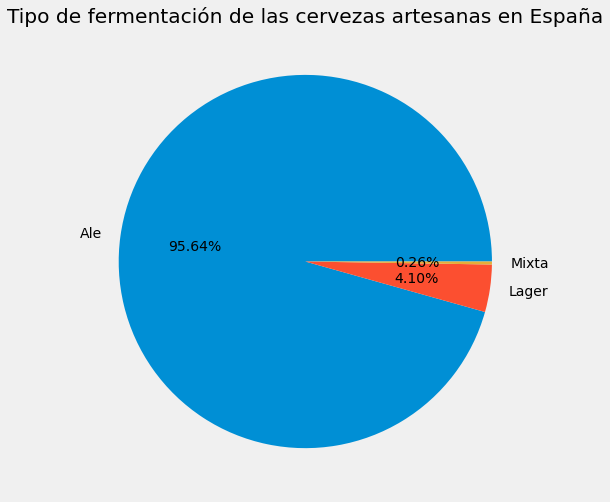

In [18]:
# Tipo de fermentación
data = df["Fermentación"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Tipo de fermentación de las cervezas artesanas en España")
plt.show();



In [19]:
# top de estilos
df['Estilo'].value_counts().head(15)

 Pale Ale            38
 India Pale Ale      31
 America Pale Ale    20
 Brown Ale           18
 Weizen Weissbier    17
 Blonde Ale          14
 Porter              11
 Amber Ale           11
 Witbier             10
 Red Ale             10
 Imperial Stout      10
 Stout                8
 Pilsner              7
 American IPA         7
 Ale                  6
Name: Estilo, dtype: int64

In [ ]:
# los estilos "raros" con una única cerveza


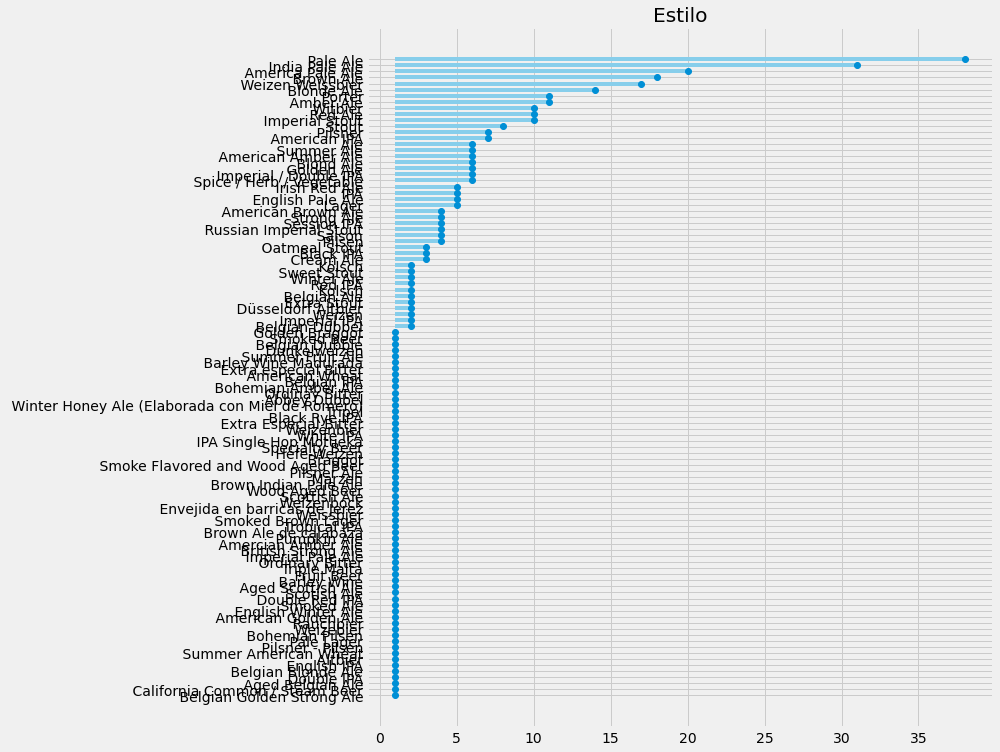

In [20]:
conteo = df['Estilo'].value_counts(ascending=True)

plt.figure(figsize=(10,12))
plt.hlines(y=conteo.index,
           xmin=1,
           xmax=conteo,
          color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title("Estilo");

In [51]:
# 106 estilos de cervezas distintos
df['Estilo'].nunique()

106

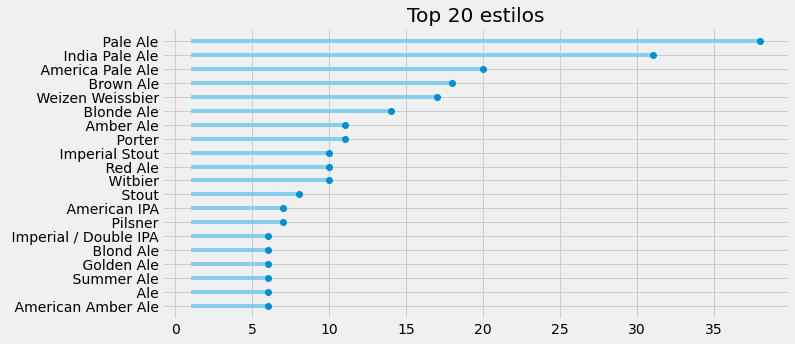

In [21]:
# Seleccionamos el top 20 de estilos de cervezas
top_estilo=df['Estilo'].value_counts().head(20).index

# dataframe auxiliar para estos estilos
top_estilo=df[df['Estilo'].isin(top_estilo)]

conteo = top_estilo['Estilo'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=1,
           xmax=conteo,
          color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title("Top 20 estilos");




In [22]:
# hay 61 estilos de cerveza que solo tienen representación en una cerveza
estilo_unico=df['Estilo'].value_counts()
estilo_unico=estilo_unico[estilo_unico==1]
estilo_unico.count()

61

In [52]:
estilo_unico

 Golden Braggot                    1
 Smoked Beer                       1
 Belgian Dubble                    1
 Dunkelweizen                      1
 Summer Fruit Ale                  1
                                  ..
 Belgian Blonde Ale                1
 Double IPA                        1
 Aged Belgian Ale                  1
 California Common / Steam Beer    1
 Belgian Golden Strong Ale         1
Name: Estilo, Length: 61, dtype: int64

### Graduación alcohólica
¿Qué grado de alcohol tienen estas cervezas? La media de graduación es de 5.8º y la mayoría están entre los 4 y los 8 grados. También en aquí encontramos interesantes excepciones que se salen de rango. Por ejemplo, la mínima graduación alcohólica la tiene "Dawat 2", una Pilsner con 2,5º. En el extremo opuesto está Matadragons, una cerveza de 14 grados similar a la de un vino, que no por casualidad es de estilo Barley Wine. Como era de esperar, no hemos encontrado cervezas 0.0, ya que la producción de alcohol forma parte del proceso de la fermentación de la levadura en la fabricación.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


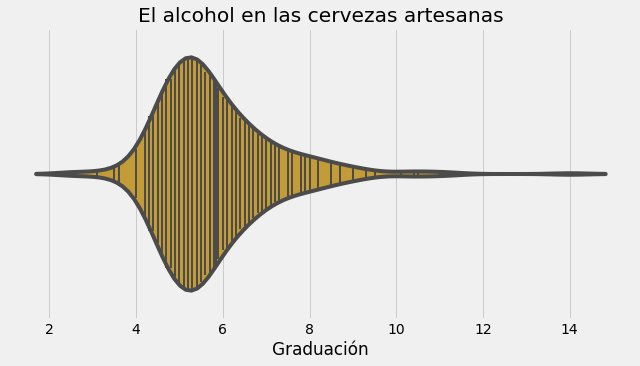

In [23]:
# Analizamos la gradución de las cervezas que tienen este dato
df_con_graducacion=df[df["Graduación"]!=999.00]
#df_con_graducacion["Graduación"].mean()  # Graduación media=5.788461538461537

plt.figure(figsize=(10,5))
sns.violinplot(df_con_graducacion["Graduación"], 
               color="goldenrod",
              inner="stick")
plt.title("El alcohol en las cervezas artesanas");

In [24]:
print("Cerveza con mínima graduación:\n",df_con_graducacion[df_con_graducacion["Graduación"]==df_con_graducacion["Graduación"].min()]["name"])
print()
print("Cerveza con máxima graduación:\n",df_con_graducacion[df_con_graducacion["Graduación"]==df_con_graducacion["Graduación"].max()]["name"])

Cerveza con mínima graduación:
 158    Dawat 2
Name: name, dtype: object

Cerveza con máxima graduación:
 241    Matadragons
Name: name, dtype: object


### El amargor (IBU)
¿Cómo son de amargas estas cervezas? El índice de amargor de la cerveza se mide en IBUs (International Bitterness Unit) y es el resultado del amargor que aportan las resinas del lúpulo, las maltas tostadas y algunas especias.
Es un rango que parte del 0 como el menos amargo y pudiendo llegar a valores superiores a 200, aunque el paladar humano no suele distinguir más de 100 o 120. En el caso de estas cervezas artesanas, hemos encontrado que tienen un amargor medio de 36,7 IBUs y la mayoría de ellas se encuentran en valores de 20 a 40 IBUs. A partir de 80 IBUs encontramos excepciones, siendo la más amarga Marina Devil's IPA, una Red Ale con 150 IBUs.

Amargor medio:  36.6948717948718
Amargor mediana:  30.0
Amargor mínimo:  8.0
Amargor máximo:  150.0
La más amarga: 378    Marina Devil's IPA
Name: name, dtype: object

Distribución de IBUS
 25.0    30
28.8    17
40.0    17
30.0    16
20.0    15
35.0    12
17.1    11
60.0    10
24.0     9
19.0     9
18.0     9
23.0     8
21.0     8
28.0     8
26.0     7
65.0     7
57.8     7
70.0     7
45.0     6
53.5     6
Name: IBU, dtype: int64



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


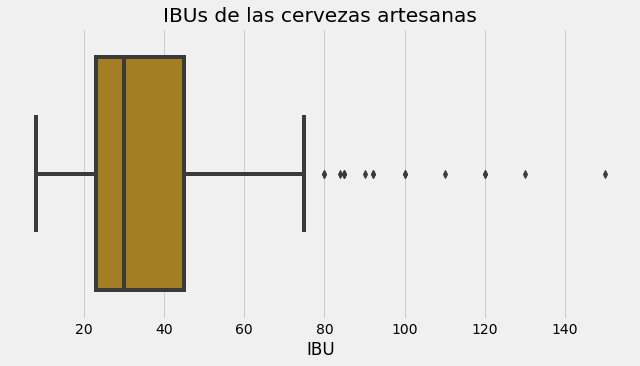

In [25]:
df["IBU"].unique()
# Analizamos el amargor de las cervezas 
print("Amargor medio: ",df["IBU"].mean())  
print("Amargor mediana: ",df["IBU"].median())  
print("Amargor mínimo: ",df["IBU"].min()) 
print("Amargor máximo: ",df["IBU"].max())  
print("La más amarga:", df[df["IBU"]==df["IBU"].max()]["name"])
print()
print("Distribución de IBUS\n",df["IBU"].value_counts().head(20))
print()

plt.figure(figsize=(10,5))
sns.boxplot(df["IBU"], color="darkgoldenrod")
plt.title("IBUs de las cervezas artesanas");

### El grano
Entre las propiedades que carazterizan a la cerveza, están el tipo de grano, los lúpulos y las maltas. Desafortunadamente, esta información no estaba disponible para todas las cervezas recogidas, por lo que finalmente se decidió prescindir de algunos de estos datos, quedándonos con la información sobre el tipo de grano. El análisis confirma que estas cervezas están hechas mayoritariamente con cebada (82%), que en algunas ocasiones se mezcla con trigo o avena. Las cervezas de trigo son la segunda variedad, en un 14% de los casos y otros cereales como la avena o el arroz son excepcionales. Este es el caso de la valenciana "Génesis Mediterrania", la única a base de arroz.

In [26]:
df["Grano"].value_counts()

Cebada            231
Trigo              38
Cebada y trigo      5
Avena               4
Cebada y avena      1
Arroz               1
Name: Grano, dtype: int64

In [27]:
# Tipos de grano y su peso en las cercezas
tipo_grano=df["Grano"].value_counts()
df_grano=pd.DataFrame(tipo_grano)

df_grano["proporción"]=round(df_grano["Grano"]/df["Grano"].count(),2)

df_grano

,Grano,proporción
Cebada,231,0.82
Trigo,38,0.14
Cebada y trigo,5,0.02
Avena,4,0.01
Cebada y avena,1,0.00
Arroz,1,0.00


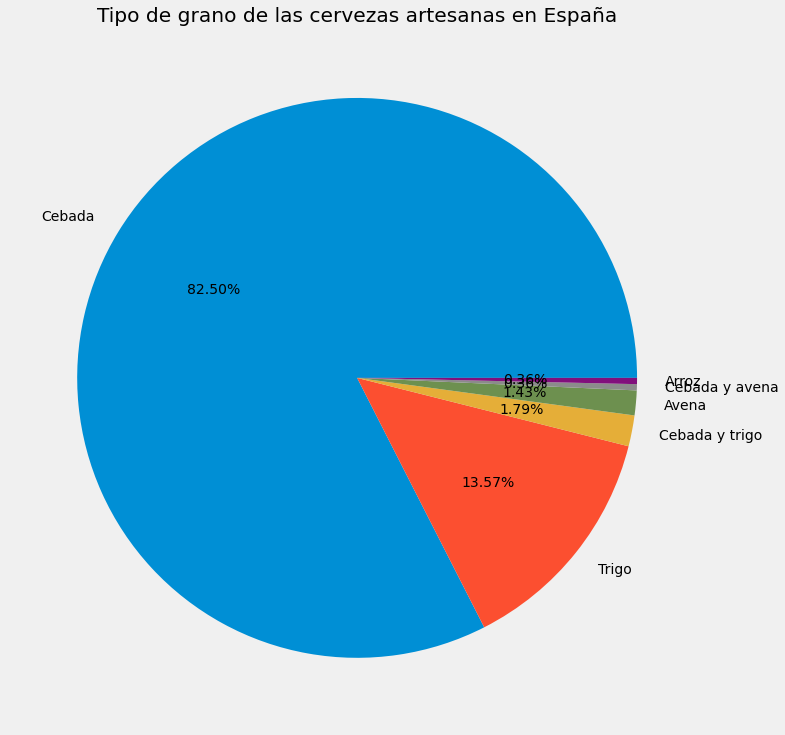

In [28]:
# Tipo de grano
data = df["Grano"].value_counts()

plt.figure(figsize=(12,12))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Tipo de grano de las cervezas artesanas en España")
plt.show();




In [29]:
print("Cerveza de arroz:\n",df[df["Grano"]=="Arroz"]["name"])
print()
print("Cervezas de avena:\n",df[df["Grano"]=="Avena"]["name"])

Cerveza de arroz:
 106    Génesis Mediterrania
Name: name, dtype: object

Cervezas de avena:
 101            Arriaca Centeno
318    Dougall's Session Stout
322                    Hendrix
351            La Virgen Negra
Name: name, dtype: object


### Las marcas y sus cerverzas
En este conjunto de datos tenemos 378 cervezas que pertenecen a 139 marcas con un reparto muy desigual. Si bien una parte de estos fabricantes (el 29,5%) cuentan con unico producto y casi la mitad (46%) fabrica dos tipos de cervezas, el resto oscila principalmente entre 3 y 6, aunque hay excepciones notables.  Destaca la valenciana Birra & Blues que tiene un catálogo de 13 cervezas de todos los colores, incluyendo una de las cinco cervezas blancas del listado general, en el que tienen más peso las rubias. Le sigue de cerca Cervezas Arriaca, que produce 11 cervezas de 9 estilos diferentes.

En el otro extremo ¿cómo son las cervezas de las marcas que solamente tienen una cerveza? Las 41 cerveceras que solo producen un tipo de cerveza no tienen una característica que las distinga del resto. Son en su mayoría cervezas rubias, con estilos variados. En este aspecto, aunque las variantes de Ale son más comunes, 10 de ellas (la cuarta parte) tienen estilos que no se repiten en el resto de cervezas analizados.

Analizando estos estilos "especiales", de los que solamente encontramos una cerveza como representación, la conclusión es que estas 65 cervezas no son la diferenciación entre los grandes catálogos y los monoproductores, ya se se reparten entre todas las marcas sin distinciones.



In [30]:
brands=df["brand"].value_counts()
print("Media por fabricante", brands.mean())
print("Mediana por fabricante", brands.median())
print()
brands

Media por fabricante 2.805755395683453
Mediana por fabricante 2.0



Birra & Blues       13
Cervezas Arriaca    11
Althaia Artesana     9
Dawat                9
Sagra                7
                    ..
Beauty               1
Marijuana            1
Barbière             1
Ruda                 1
Ginesart             1
Name: brand, Length: 139, dtype: int64

In [31]:
# Hacemos un df para ver las cervezas por marca
cervezas_por_marca=brands.value_counts()
cervezas_por_marca.sort_index(inplace=True)
df_cervezas_por_marca=pd.DataFrame(cervezas_por_marca)

df_cervezas_por_marca.index.name = 'Cervezas en catálogo'
df_cervezas_por_marca.rename(columns={"brand":"Marcas"},inplace=True)
df_cervezas_por_marca["proporción %"]=round(df_cervezas_por_marca["Marcas"]*100/brands.size,2)

df_cervezas_por_marca

,Marcas,proporción %
Cervezas en catálogo,,
1,41,29.50
2,32,23.02
3,31,22.30
4,15,10.79
5,7,5.04
6,8,5.76
7,1,0.72
9,2,1.44
11,1,0.72


In [32]:
df_cervezas_por_marca["Marcas"].sum()

139

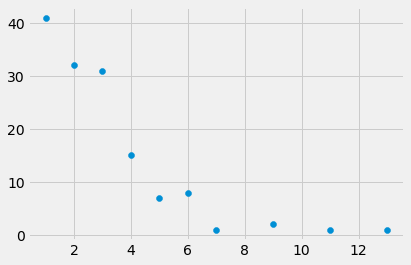

In [33]:
plt.scatter(df_cervezas_por_marca.index, df_cervezas_por_marca["Marcas"])
plt.show()

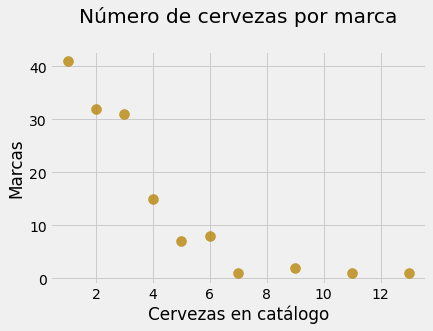

In [34]:
plt.scatter(df_cervezas_por_marca.index, df_cervezas_por_marca["Marcas"],c="darkgoldenrod", s=100, alpha=0.8) 
plt.ylabel('Marcas')
plt.xlabel('Cervezas en catálogo') 
plt.title("Número de cervezas por marca\n");

In [35]:
# solo 1 cerveza
print("Marcas con 1 producto: ",brands[brands==1].count(), "son el",round(brands[brands==1].count()*100/brands.size,2),"%")
solo_1=brands[brands==1].index
solo_1

Marcas con 1 producto:  41 son el 29.5 %


Index(['Cartujana', 'Er Boquerón', 'La Socarrada', 'La Quince', 'Del Pueblo',
       'Pato Nero', 'Tastet', 'Cervezas Libre', 'Alma Turdetana',
       'La Txika de la Cerveza', 'UnaRubia', 'Madriz', 'Cervezas Nel',
       'Cerveza San Gabriel', 'Senador Volstead', 'Zeta Beer',
       'Cervecera Kel's', 'Cervezas Murex', 'Mateo & Bernabé', 'Roy The Bull',
       'Osborne', 'Boira', 'Oripell', 'Cerveza del Jerte', 'Cerveza Tenuis',
       'La Vidigonera', 'Ausesken', 'Cañonita', 'Cerveza Archi', 'ZerB',
       'Cervezas Gaitanejo', 'Red Courtesy', 'Bronhër', 'Espina de Ferro',
       'Bonvivant', 'Cervexa Auriun', 'Beauty', 'Marijuana', 'Barbière',
       'Ruda', 'Ginesart'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

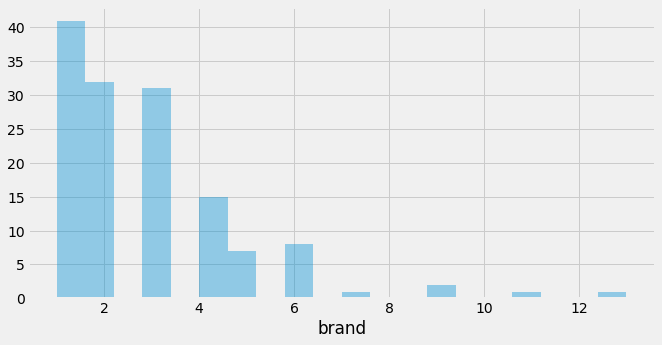

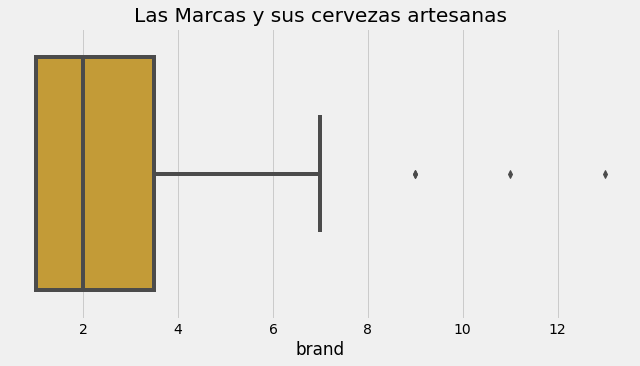

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(brands, 
            kde=False,
            bins=20);

plt.figure(figsize=(10,5))
sns.boxplot(brands, color="goldenrod")
plt.title("Las Marcas y sus cervezas artesanas")
;

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


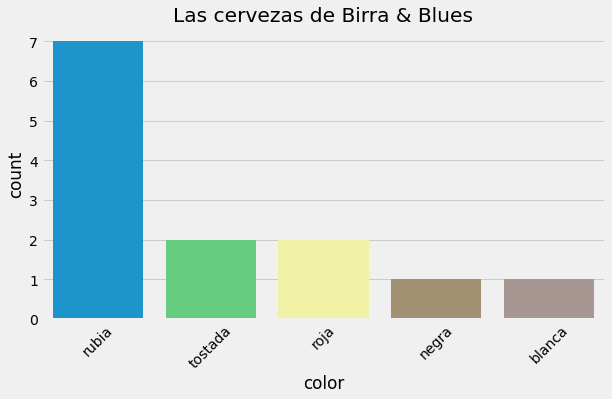

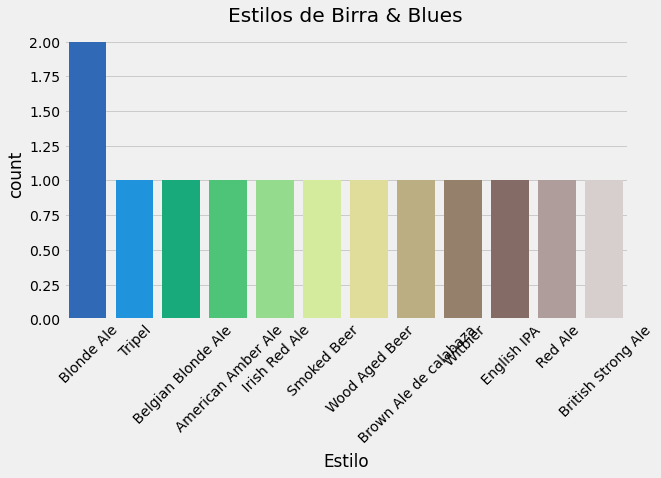

In [37]:
df_BB=df[df["brand"]=="Birra & Blues"]

plt.figure(figsize=(9,5))
sns.countplot(df_BB['color'], 
              palette="terrain",
              order = df_BB['color'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Las cervezas de Birra & Blues");


plt.figure(figsize=(9,5))
sns.countplot(df_BB['Estilo'], 
              palette="terrain",
              order = df_BB['Estilo'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Estilos de Birra & Blues");

In [38]:
# ¿Cuántas cervezas blancas tenemos?
df[df["color"]=="blanca"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 365 to 369
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5 non-null      int64  
 1   color               5 non-null      object 
 2   name                5 non-null      object 
 3   brand               5 non-null      object 
 4   description         5 non-null      object 
 5   image               5 non-null      object 
 6   Estilo              5 non-null      object 
 7   Graduación          5 non-null      float64
 8   Fermentación        5 non-null      object 
 9   IBU                 5 non-null      float64
 10  Grano               4 non-null      object 
 11  Población           5 non-null      object 
 12  Provincia           5 non-null      object 
 13  Comunidad Autónoma  5 non-null      object 
 14  País                5 non-null      object 
dtypes: float64(2), int64(1), object(12)
memory usage: 640.0+ 

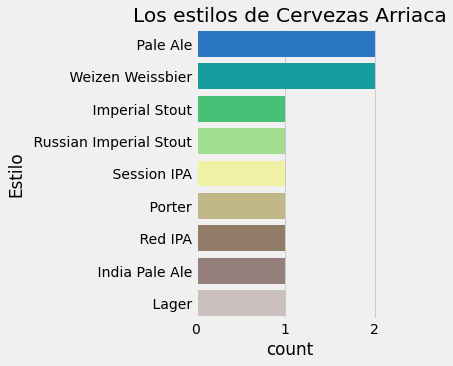

In [39]:
df_BB=df[df["brand"]=="Cervezas Arriaca"]

plt.figure(figsize=(3,5))
sns.countplot(data=df_BB,
              y='Estilo',
              palette="terrain",
              order = df_BB['Estilo'].value_counts().index)
plt.title("Los estilos de Cervezas Arriaca");

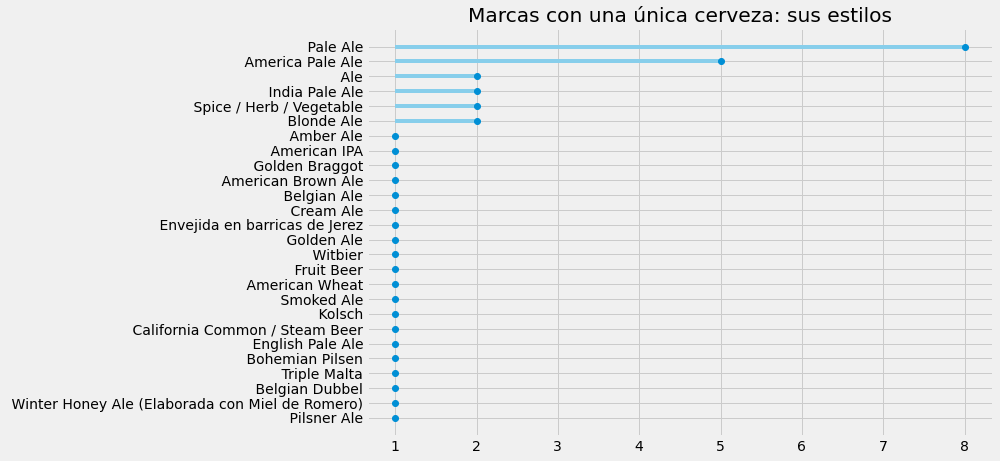

In [40]:
# ¿qué tipo de cerveza fabrican los que solo tienen 1 cerveza? Utilizo "solo_1" que tiene las brand con una única cerveza

df_solo_1=df[df["brand"].isin(solo_1)]
conteo = df_solo_1['Estilo'].value_counts(ascending=True)

plt.figure(figsize=(10,7))
plt.hlines(y=conteo.index,
           xmin=1,
           xmax=conteo,
          color='skyblue')
plt.plot(conteo, conteo.index, "o")
plt.title("Marcas con una única cerveza: sus estilos");




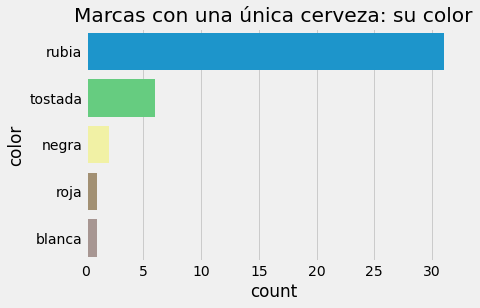

In [41]:
sns.countplot(data=df_solo_1,
              y='color',
              palette="terrain",
              order = df_solo_1['color'].value_counts().index)
plt.title("Marcas con una única cerveza: su color");



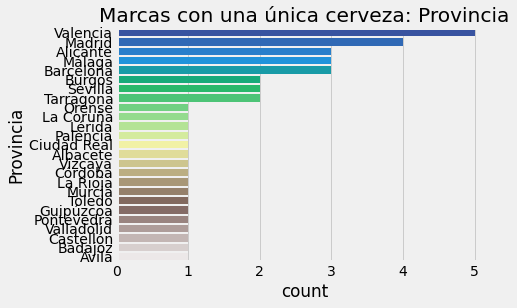

In [42]:
sns.countplot(data=df_solo_1,
              y='Provincia',
              palette="terrain",
              order = df_solo_1['Provincia'].value_counts().index)
plt.title("Marcas con una única cerveza: Provincia");




In [43]:
# Ahora al revés, los estilos de cerveza que solo tienen una cerveza (raras) ¿corresponden con productores de catálogo grande o pequeño?
estilos_cervezas=df['Estilo'].value_counts()  #listado de todos los estilos
raras=estilos_cervezas[estilos_cervezas==1].index  #listado de estilos raros
#estilo_unico.nunique()   Hay 61 estilos que solo aparecen 1 vez

marcas_con_cervezas_raras=df[df["Estilo"].isin(raras)]["brand"]  # listado de marcas con estilos raros (una marca puede tener 2 ó más cervezas raras)

df_cervezas_raras=df[df["brand"].isin(marcas_con_cervezas_raras)]  #df de las marcas que tienen cervezas raras con todas sus cervezas
df_cervezas_solo_raras=df_cervezas_raras[df_cervezas_raras["Estilo"].isin(raras)] #df de las marcas que tienen cervezas raras con datos solo con esas cervezas
df_cervezas_raras["brand"].nunique()   # 43 casos
comparar_raras=df_cervezas_raras["brand"].value_counts()
df_cervezas_solo_raras["brand"].nunique()  #43 casos
df_cervezas_solo_raras["brand"].value_counts() 

 
#Montamos el df con los datos obtenidos de cervezas totales de la marca y raras
df_comparar_raras=pd.DataFrame(comparar_raras)
df_comparar_raras["Total_raras"]=df_cervezas_solo_raras["brand"].value_counts() 
df_comparar_raras.reset_index(level=0, inplace=True)
df_comparar_raras.rename(columns={"brand": "Total_productos","index":"Brand"},inplace=True)
df_comparar_raras["proporción"]=round(df_comparar_raras["Total_raras"]/df_comparar_raras["Total_productos"],1)

df_comparar_raras

,Brand,Total_productos,Total_raras,proporción
0,Birra & Blues,13,7,0.5
1,Althaia Artesana,9,2,0.2
2,Dawat,9,2,0.2
3,Cerveza Milana,6,1,0.2
4,Cerveses La Pirata,6,1,0.2
5,Morlaco Beer,6,1,0.2
6,Hort del barret,6,3,0.5
7,Cerveza Tartessos,6,1,0.2
8,L'anjub,6,2,0.3
9,Dougall's,6,2,0.3


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


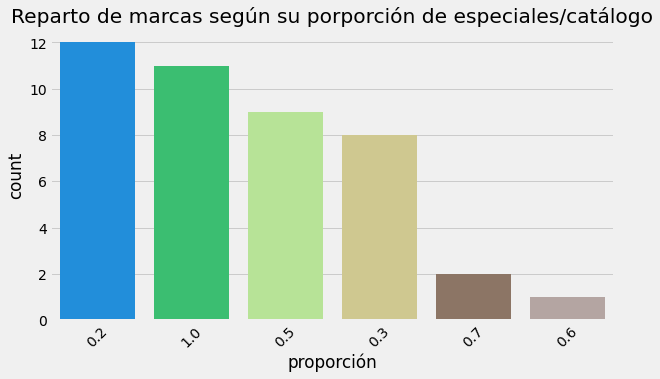

In [44]:
plt.figure(figsize=(9,5))
sns.countplot(df_comparar_raras["proporción"], 
              palette="terrain",
              order = df_comparar_raras["proporción"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Reparto de marcas según su porporción de especiales/catálogo");

In [45]:
df_comparar_raras["proporción"].value_counts().sort_index()

0.2    12
0.3     8
0.5     9
0.6     1
0.7     2
1.0    11
Name: proporción, dtype: int64

In [46]:
# Las marcas con una única cerveza y que además, tienen estilos raros
df_raras_en_unicas=df_cervezas_solo_raras[df_cervezas_solo_raras["brand"].isin(solo_1)]
df_raras_en_unicas.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 330
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10 non-null     int64  
 1   color               10 non-null     object 
 2   name                10 non-null     object 
 3   brand               10 non-null     object 
 4   description         10 non-null     object 
 5   image               10 non-null     object 
 6   Estilo              10 non-null     object 
 7   Graduación          10 non-null     float64
 8   Fermentación        10 non-null     object 
 9   IBU                 10 non-null     float64
 10  Grano               7 non-null      object 
 11  Población           10 non-null     object 
 12  Provincia           10 non-null     object 
 13  Comunidad Autónoma  10 non-null     object 
 14  País                10 non-null     object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.2+ KB


### Análisis de las descripciones
¿Cómo se defimen estas cervezas?¿qué tienen en comúm? ¿qué las diferencia?
Analizamos el contenido de las descripciones, preparando previamente los textos, para conocer un poco mejor estos productos

In [53]:
# Trabajamos con el campo description
df["description"]

0      \nUna doble IPA rubia, potente y seca. Elabora...
1      \nAquí está la primera cerveza de Roy The Bull...
2      \nLa única cerveza cerveza artesana que podrás...
3      \nUna cerveza de trigo muy afrutada y ligera. ...
4      \nCerveza de estilo IPA elaborada con trigo, j...
                             ...                        
385    \nTastet Beer elabora cervezas con mayúsculas....
386    \nGram Prima es la cerveza artesana roja que e...
387    \nLa cerveza artesana nordeste de Cerveza La G...
388    \nLa cerveza artesana burro de Sancho Roja que...
389    \nLa cerveza artesana Sagra Roja es una cervez...
Name: description, Length: 390, dtype: object

In [56]:
# creo texto limpio en nueva columna
df["texto_limpio"]=df["description"]

# quito mayúsculas
df["texto_limpio"]=df["texto_limpio"].str.lower()

#quito signos de puntuación
df["texto_limpio"]=df["texto_limpio"].translate(str.maketrans('', '', string.punctuation)

SyntaxError: unexpected EOF while parsing (<ipython-input-56-951b29ea4a14>, line 8)